# Libraries

In [29]:
from sklearn.datasets import load_wine
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
import pandas as pd

In [30]:
data = load_wine()
print(data['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [31]:
data1 = data.data
data2 = data.target

# Train Test Split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(data1, data2, test_size=0.33, random_state=0)

# Visualizing Decision Boundary

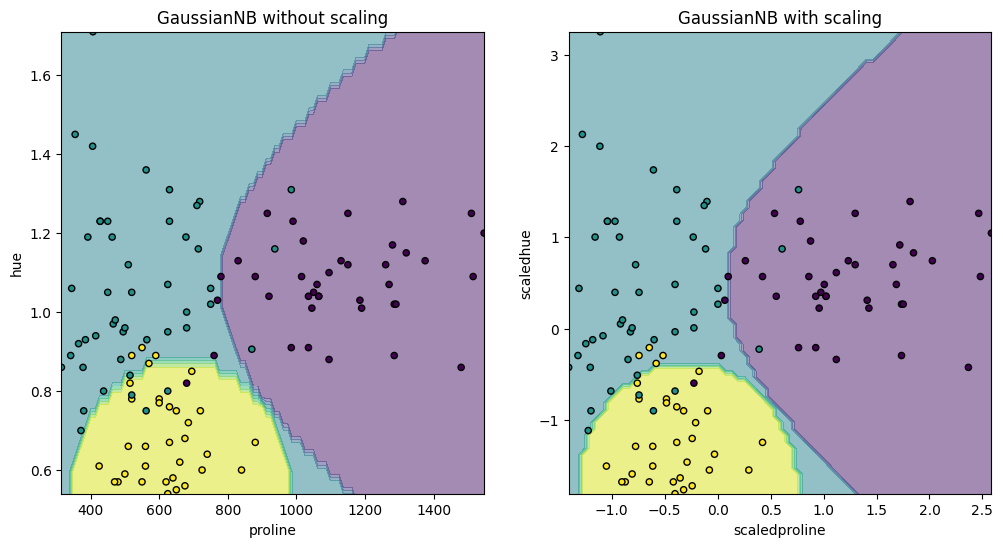

In [33]:
X_plot=pd.DataFrame({'proline':X_train[:,12],'hue':X_train[:,10]})
X_plot_scaled=scaler.fit_transform(X_plot)
X_plot_scaled = pd.DataFrame({'proline':X_plot_scaled[:,0],'hue':X_plot_scaled[:,1]})
clf=GaussianNB()
def fit_and_plot_model(X_plot,y,clf,ax):
    clf.fit(X_plot,y)
    disp=DecisionBoundaryDisplay.from_estimator(clf,X_plot,response_method="predict",alpha=0.5,ax=ax,)
    disp.ax_.scatter(X_plot["proline"],X_plot["hue"],c=y,s=20,edgecolor="k")
    disp.ax_.set_xlim((X_plot["proline"].min(),X_plot["proline"].max()))
    disp.ax_.set_ylim((X_plot["hue"].min(),X_plot["hue"].max()))
    return disp.ax_
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,6))
fit_and_plot_model(X_plot,y_train,clf,ax1)
ax1.set_title("GaussianNB without scaling")
fit_and_plot_model(X_plot_scaled,y_train,clf,ax2)
ax2.set_xlabel("scaledproline")
ax2.set_ylabel("scaledhue")
_=ax2.set_title("GaussianNB with scaling")